In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [24]:
#load the file 
df = pd.read_csv("SP500_3yr.csv")

In [25]:
df.head()

,Date,Open,High,Low,Close
0,3/1/2022,4462.40,4637.30,4424.30,4530.41
1,4/1/2022,4540.32,4593.45,4124.28,4131.93
2,5/1/2022,4130.61,4307.66,3810.32,4132.15
3,6/1/2022,4149.78,4177.51,3636.87,3785.38
4,7/1/2022,3781.08,4140.15,3721.56,4130.29


In [26]:
df.shape

(37, 5)

In [27]:
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [28]:
df.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [29]:
cols_to_convert = ['Open', 'High', 'Low', 'Close']  # List of columns to convert
df[cols_to_convert] = df[cols_to_convert].replace(',', '', regex=True).astype(float)


In [30]:
df['Date'] = pd.to_datetime(df['Date'])

In [31]:
print(df.dtypes)


Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object


<Axes: >

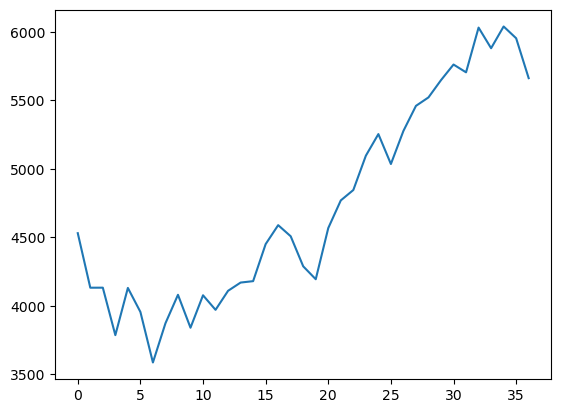

In [32]:
df['Close'].plot()

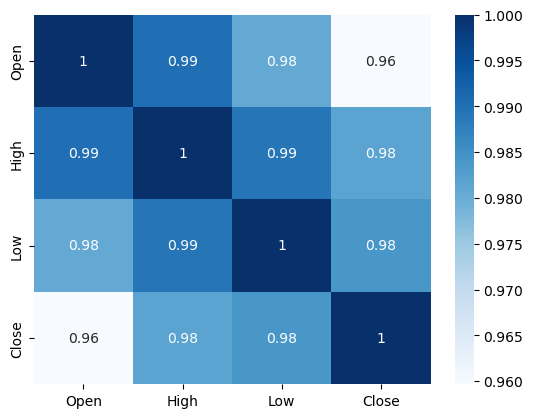

In [33]:
df_numeric = df.select_dtypes(include=['number'])  # Select only numeric columns
sns.heatmap(df_numeric.corr(), cmap="Blues", annot=True)
plt.show()


In [34]:
# Splitting the data for testing 
x= df[['Open', 'High', 'Low']].values
y= df['Close'].values

In [35]:
# Spilt the data 80% train and 20% testing 
from sklearn.model_selection import train_test_split
# Splitting the data 80% train and 20% testing 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [36]:
# Training the Model for linera Prediction 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score  # Confusion matrix isn't used for regression
import statsmodels.api as sm  # For statistical modeling


# Creating Rergression model 
regressor = LinearRegression()

# fit linear regression model 
model = regressor.fit(x_train, y_train)

# Use model to make predictions
y_pred = regressor.predict(x_test)

In [37]:
# Prediction Table of Actual Prices vs Predicted values 
# with the test predictions complete, the the next step will better compare them 
# with the actual output values for x_test by orgnizing them in DataFrameformat:

predicted = regressor.predict(x_test)

dframe = pd.DataFrame(y_test,predicted)
dfr = pd.DataFrame({'Actual_Price':y_test,'predicted_price':predicted})
print(dfr)

   Actual_Price  predicted_price
0       4845.65      4872.729271
1       4567.80      4559.192606
2       4588.96      4543.279217
3       4076.60      4023.686746
4       5705.45      5823.061705
5       5522.30      5611.356772
6       4450.38      4425.403161
7       3970.15      4083.141493


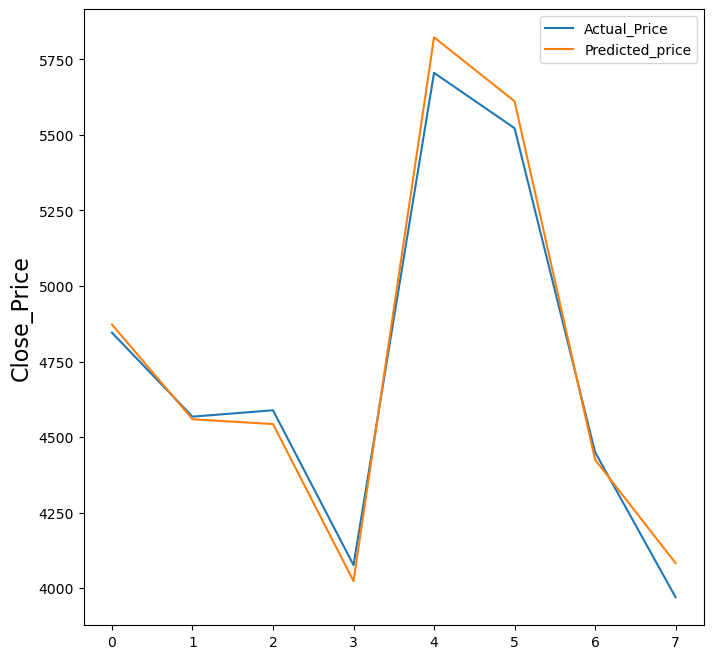

In [38]:
plt.figure(figsize=(8,8))
plt.ylabel('Close_Price', fontsize=16)
plt.plot(dfr)
plt.legend(['Actual_Price', 'Predicted_price'])
plt.show()

<Axes: >

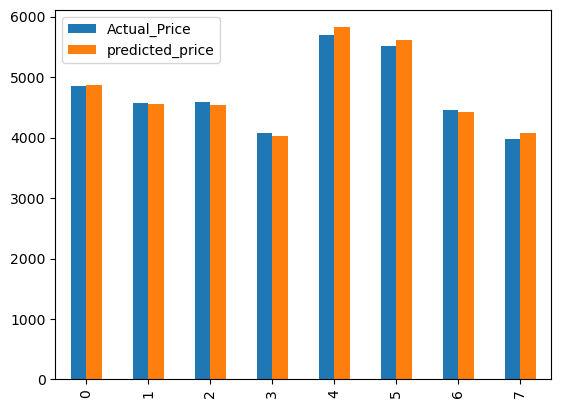

In [39]:
# graph first 15 values
graph = dfr.head(15)
graph.plot(kind='bar')

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [44]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Absolute Error (MAE): 126.03
Mean Squared Error (MSE): 27216.86
R^2 Score: 0.95
